<a href="https://colab.research.google.com/github/leshless/study/blob/main/python_algebra/task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy
from sympy import  Point, Line, Plane, Point3D, Eq, Matrix, S, Symbol, symbols, latex
from IPython.display import display, Latex
from google.colab import files
import pandas as pd

# Практическое занятие 7
# Компьютерный практикум по алгебре на Python
https://docs.sympy.org/latest/search.html?q=geometry

## Прямые и плоскости в пространстве. Модуль Geometry
### Задание 1.
Даны точки: $A(7, 5, 4)$,  $B(6, 1, 6)$, $C(5, -3, 8)$, $D(2, 2, 6)$, $F(-7, 8, -1)$.
Составить список точек и словарь точек (ключи - точки, значения - имена точек).

Составить, пользуясь списком и словарем точек, список и словарь прямых (ключи - прямые Line, значения - имена прямых, состоящие из имен точек, например AD). Рассматривать только прямые, проведенные по различным парам точек, например, $AB$ и $AC$ это разные прямые, а $AB$ и $BA$ это одна и та же прямая, в словарь включаем только $AB$, не включаем $BA$.

Вывести на экран значения записей словаря (т.е. имена прямых).

Найти среди прямых словаря пары совпадающих прямых, вывести на экран их имена.

In [7]:
A = Point3D(7, 5, 4)
B = Point3D(6, 1, 6)
C = Point3D(5, -3, 8)
D = Point3D(2, 2, 6)
F = Point3D(-7, 8, -1)

points = [A, B, C, D, F]
point_names = (["A", "B", "C", "D", "F"])

display(dict(zip(point_names, points)))

lines = []
line_names = []
for i in range(0, len(points)):
  for j in range(i+1, len(points)):
    lines.append(Line(points[i], points[j]))
    line_names.append(point_names[i] + point_names[j])

for i in range(0, len(lines)):
  for j in range(i+1, len(lines)):
    if lines[i].equals(lines[j]):
      display(f"lines {line_names[i]} and {line_names[j]} are equal")

{'A': Point3D(7, 5, 4),
 'B': Point3D(6, 1, 6),
 'C': Point3D(5, -3, 8),
 'D': Point3D(2, 2, 6),
 'F': Point3D(-7, 8, -1)}

'lines AB and AC are equal'

'lines AB and BC are equal'

'lines AC and BC are equal'

###  Задание 2
Составить список всех плоскостей, проходящих через любые три точки Задания 1 (плоксости, построенные по одинаковым точкам считаются одной плоскостью, т.е. ABC, CBA, ACB и т.п. это одна и та же плоскость, в список включать только ABC). Вывести на экран названия и  уравнения плоскостей из списка и расстояние от  плоскостей до начала координат.

In [20]:
A = Point3D(7, 5, 4)
B = Point3D(6, 1, 6)
C = Point3D(5, -3, 8)
D = Point3D(2, 2, 6)
F = Point3D(-7, 8, -1)
O = Point3D(0, 0, 0)

points = [A, B, C, D, F]
point_names = (["A", "B", "C", "D", "F"])

planes = []
plane_names = []

for i in range(0, len(points)):
  for j in range(i+1, len(points)):
    for k in range(j+1, len(points)):
      if not Point3D.are_collinear(points[i], points[j], points[k]):
        planes.append(Plane(points[i], points[j], points[k]))
        plane_names.append(point_names[i] + point_names[j] + point_names[k])

for i in range(len(planes)):
  display(Latex(f"{plane_names[i]}"))
  display(planes[i].equation())
  display(planes[i].distance(O))

<IPython.core.display.Latex object>

-2*x - 8*y - 17*z + 122

122*sqrt(357)/357

<IPython.core.display.Latex object>

14*x - 33*y - 59*z + 303

303*sqrt(4766)/4766

<IPython.core.display.Latex object>

-4*x - 16*y - 34*z + 244

122*sqrt(357)/357

<IPython.core.display.Latex object>

28*x - 66*y - 118*z + 606

303*sqrt(4766)/4766

<IPython.core.display.Latex object>

9*x - 53*y - 57*z + 430

430*sqrt(6139)/6139

<IPython.core.display.Latex object>

-2*x - 8*y - 17*z + 122

122*sqrt(357)/357

<IPython.core.display.Latex object>

14*x - 33*y - 59*z + 303

303*sqrt(4766)/4766

<IPython.core.display.Latex object>

-7*x - 28*y - 15*z + 160

80*sqrt(2)/23

<IPython.core.display.Latex object>

-23*x - 3*y + 27*z - 110

110*sqrt(1267)/1267

###  Задание 2*
Составить список всех **различных** плоскостей, проходящих через любые три точки Задания 1. Вывести на экран названия и  уравнения каждой плоскости из списка и расстояние от  плоскости до самой далекой от нее точки.

In [23]:
A = Point3D(7, 5, 4)
B = Point3D(6, 1, 6)
C = Point3D(5, -3, 8)
D = Point3D(2, 2, 6)
F = Point3D(-7, 8, -1)

points = [A, B, C, D, F]
point_names = (["A", "B", "C", "D", "F"])

planes = []
plane_names = []

for i in range(0, len(points)):
  for j in range(i+1, len(points)):
    for k in range(j+1, len(points)):
      if not Point3D.are_collinear(points[i], points[j], points[k]):
        planes.append(Plane(points[i], points[j], points[k]))
        plane_names.append(point_names[i] + point_names[j] + point_names[k])


planes_ = []
plane_names_ = []

for i in range(len(planes)):
  unique = True

  for j in range(len(planes_)):
    if planes[i].equals(planes_[j]):
      unique = False

  if unique:
    planes_.append(planes[i])
    plane_names_.append(plane_names[i])

for i in range(len(planes_)):
  display(Latex(f"{plane_names_[i]}"))
  display(planes_[i].equation())

  mx = S.Zero

  for p in points:
    if planes_[i].distance(p) > mx:
      mx = planes_[i].distance(p)

  display(mx)

<IPython.core.display.Latex object>

-2*x - 8*y - 17*z + 122

89*sqrt(357)/357

<IPython.core.display.Latex object>

14*x - 33*y - 59*z + 303

89*sqrt(4766)/4766

<IPython.core.display.Latex object>

9*x - 53*y - 57*z + 430

178*sqrt(6139)/6139

<IPython.core.display.Latex object>

-7*x - 28*y - 15*z + 160

89*sqrt(2)/46

<IPython.core.display.Latex object>

-23*x - 3*y + 27*z - 110

178*sqrt(1267)/1267

###  Задание 3
Точка $G(-1, 2, 0)$, остальные точки из Задания 1. Построить плоскость, перпендикулярную плоскости $ABG$, проходящую через $D$ и $F$. Построить плоскость, параллельную плоскости $ABF$, проходящую через $D$. Найти линию пересечения построенных плоскостей и расстояние от линии до $ABG$.

Вывести на экран уравнения построенных  плоскостей, линии пересечения $ABG$  и расстояние от линии  пересечения до $ABG$.

In [34]:
A = Point3D(7, 5, 4)
B = Point3D(6, 1, 6)
C = Point3D(5, -3, 8)
D = Point3D(2, 2, 6)
F = Point3D(-7, 8, -1)
G = Point3D(-1, 2, 0)

ABG = Plane(A, B, G)
plane1 = ABG.perpendicular_plane(D, F)

ABF = Plane(A, B, F)
plane2 = ABF.parallel_plane(D)

line = plane1.intersection(plane2)[0]

display(plane1.equation())
display(plane2.equation())
display(line.equation())
display(ABG.distance(line))

-314*x - 415*y + 48*z + 1170

14*x - 33*y - 59*z + 392

(17854*x + 26069*y - 87846, -16172*x + 26069*z - 124070)

0

###  Задание 4*
Вася хочет развесить гирлянду по вершинам растущих во дворе деревьев, координаты вершин в файле "trees.xlsx". Гирлянды расходятся от одного из деревьев к каждому из остальных. Длины гирлянд, соединяющих два дерева, - целые числа (если расстояние между вершинами деревьев не целое число, то длина округляется в **большую** сторону).

Записать в файл "chains.xlsx" суммарную длину гирлянд, расходящихся от центра, если центром может быть любое дерево из "trees.xlsx", подпись строки - название центрального дерева. В файле строки должны быть расположены по возрастанию суммарной длины гирлянд.

In [35]:
uploaded = files.upload()

Saving trees.xlsx to trees.xlsx


In [48]:
points_table = pd.read_excel('trees.xlsx', index_col=0)
coords = points_table.to_numpy()

tree_names = points_table.index
trees = [Point3D(p) for p in coords]

dst_sums = []
for t1 in trees:
  sum = 0

  for t2 in trees:
    dst = sympy.ceiling(t1.distance(t2))
    sum += dst

  dst_sums.append(sum)

lst = list(zip(tree_names, dst_sums))
lst.sort(key = lambda x : x[1])

with pd.ExcelWriter("dist.xlsx") as writer:
    df = pd.DataFrame(lst, columns=["Дерево", "Расстояние"])
    df.to_excel(writer, header=True)

files.download("dist.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Индивидуальное задание

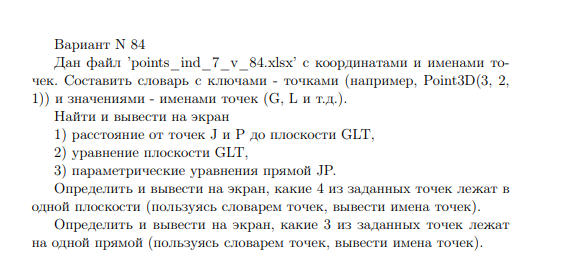

In [49]:
uploaded = files.upload()

Saving points_ind_7_v_84.xlsx to points_ind_7_v_84.xlsx


In [70]:
points_table = pd.read_excel('points_ind_7_v_84.xlsx', index_col=0)
coords = points_table.to_numpy()

point_names = points_table.index
points = [Point3D(p) for p in coords]

points_to_names = dict(zip(points, point_names))
names_to_points = dict(zip(point_names, points))

G = names_to_points["G"]
L = names_to_points["L"]
T = names_to_points["T"]
J = names_to_points["J"]
P = names_to_points["P"]

GLT = Plane(G, L, T)

display(Latex(f"P(GLT, J) = {latex(GLT.distance(J))}"))
display(Latex(f"GLT:\;{latex(Eq(GLT.equation(), 0))}"))

t = symbols("t")
x, y, z = symbols("x y z")
JPeq = [
    Eq(x, J[0] + (P[0] - J[0]) * t),
    Eq(y, J[1] + (P[1] - J[1]) * t),
    Eq(z, J[2] + (P[2] - J[2]) * t),
]
display(Latex(f"JP:\;{latex(JPeq)}"))

from itertools import combinations

for points_ in combinations(points, 4):
  if Point3D.are_coplanar(points_):
    names_ = [points_to_names[p] for p in points_]
    display(names_)
    break

for points_ in combinations(points, 3):
  if Point3D.are_collinear(points_[0], points[1], points[2]):
    names_ = [points_to_names[p] for p in points_]
    display(names_)
    break

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

['G', 'J', 'L', 'P']

['J', 'L', 'P']